# Example notebook for testing basics out

In [1]:
# Jupyter magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [270]:
# imports
import pandas as pd
import pathlib
import spacy
import collections
from textblob import TextBlob
import gensim
import matplotlib
import numpy as np
import string
import matplotlib.pyplot as plt

In [263]:
import seaborn as sns

### Load sample articles 

These were mentioned by Kathy in the [brief](https://docs.google.com/document/d/1ncZfFND1ytnZ3kgMl8RC4GtBFkC3-tAlBDQxuFhRgAU/edit). I manually copied and pasted the text into dropbox to make some quick data.

In [3]:
data_dir = '../1_data/example_articles/'
p = pathlib.Path(data_dir)

articles = {}
for article_path in p.glob('*'):
    if article_path.is_dir():
        continue
    
    name = article_path.name
    txt = article_path.read_text()
    articles[name] = txt
    
    print(f'{name}    - has {len(txt)} chars')

orbia_2019_forbes    - has 6585 chars
orbia_2019_howtolead    - has 6753 chars
orbia_2018_reuters_businessnews    - has 2376 chars
orbia_2019_quartzatwork    - has 20006 chars
marvin_2017_pressrelease.txt    - has 4284 chars
orbia_2018_earnings    - has 31100 chars


In [4]:
articles.keys()

dict_keys(['orbia_2019_forbes', 'orbia_2019_howtolead', 'orbia_2018_reuters_businessnews', 'orbia_2019_quartzatwork', 'marvin_2017_pressrelease.txt', 'orbia_2018_earnings'])

## Trying out word frequencies with Spacy



In [49]:
# This command is going to fail if the "en_core_web_sm" corpus hasn't been installed yet.
nlp = spacy.load("en_core_web_sm")
all_stopwords = nlp.Defaults.stop_words


nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated

In [59]:
doc = nlp(articles['orbia_2019_forbes'])

In [186]:
good = ['orbia_2019_forbes', 'orbia_2019_howtolead', 'orbia_2019_quartzatwork']
bad = ['orbia_2018_reuters_businessnews', 'orbia_2018_earnings']


In [205]:
def text2bow(words, dictionary):
    word_frequences = collections.defaultdict(int)
    for word in words:
        if word not in dictionary:
            dictionary[word] = len(dictionary)
        word_frequences[dictionary[word]] += 1
 
    return list(word_frequences.items())


punct = string.punctuation + "“”\n\r\t"

dictionary = {}


sentences = []
all_words = []
word_freqs = []
docs = []
names = []
for name, a in articles.items():
    doc = nlp(a)
    docs.append(doc)
    names.append(name)
    sentences += [sent.string.strip() for sent in doc.sents]
#     word_lemmas = [w.lemma_.strip() for w in doc]
    word_lemmas = [w.text.lower().strip() for w in doc]
    word_lemmas = [w for w in word_lemmas if w not in punct]
    word_lemmas = [w for w in word_lemmas if w not in all_stopwords]
    all_words += word_lemmas
    word_freqs.append(text2bow(word_lemmas, dictionary))
    
len(sentences)

1013

In [279]:
df

,orbia_2019_forbes,orbia_2019_howtolead,orbia_2018_reuters_businessnews,orbia_2019_quartzatwork,marvin_2017_pressrelease.txt,orbia_2018_earnings
0,,,,,,
0,5.0,1.0,0.0,1.0,0.0,2.0
1,2.0,1.0,0.0,0.0,0.0,10.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,10.0,10.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2122,0.0,0.0,0.0,0.0,0.0,1.0
2123,0.0,0.0,0.0,0.0,0.0,1.0
2124,0.0,0.0,0.0,0.0,0.0,1.0


## Add some bag of word frequency analysis for Good and Bad articles

In [183]:
data = []
for i, (name, txt) in enumerate(articles.items()):
    print(i, name)
    wf = word_freqs[i]
    a = pd.DataFrame(wf).set_index(0).sort_index()
    a.columns = [name]
    data.append(a)
df = pd.concat(data, axis=1).fillna(0)

0 orbia_2019_forbes
1 orbia_2019_howtolead
2 orbia_2018_reuters_businessnews
3 orbia_2019_quartzatwork
4 marvin_2017_pressrelease.txt
5 orbia_2018_earnings


In [193]:
g = df[good].mean(axis=1)
b = df[bad].mean(axis=1)
dif = g - b

dict_series = pd.Series(dictionary).sort_values()
dif.index = [dict_series.index[i] for i in dif.index]
dif = dif.sort_values(ascending=False)

In [201]:
dif.head(30)

purpose           15.833333
martínez          13.333333
orbia             13.000000
says              11.000000
company            8.166667
—                  7.333333
employees          4.166667
new                4.166667
people             4.000000
valle              3.666667
companies          3.500000
life               3.333333
problems           3.166667
’                  3.000000
investors          3.000000
mr                 3.000000
transformation     2.833333
profit             2.666667
goals              2.666667
impactmark         2.666667
advance            2.333333
things             2.333333
sense              2.333333
making             2.333333
challenges         2.166667
world              2.166667
sustainability     2.000000
big                2.000000
security           2.000000
global             2.000000
dtype: float64

In [203]:
dif.tail(50)

sales          -4.000000
acquisition    -4.166667
increased      -4.500000
capital        -4.500000
said           -4.500000
vanessa        -4.500000
fluent         -4.500000
business       -4.666667
2017           -4.666667
continue       -5.000000
c.v.           -5.000000
organic        -5.000000
innovation     -5.166667
26             -5.166667
expect         -5.166667
seeing         -5.500000
moving         -5.500000
q2             -5.500000
thursday       -5.500000
11:00          -5.500000
eastern        -5.500000
s.a.b.         -5.500000
significant    -5.666667
market         -5.666667
quarter        -5.666667
operator       -6.000000
half           -6.000000
debt           -6.000000
fluor          -6.000000
results        -6.166667
strong         -6.166667
mentioned      -6.500000
--             -6.500000
terms          -6.666667
second         -7.000000
july           -7.000000
de             -7.500000
forward        -7.666667
question       -9.333333
growth         -9.333333


## Doc similarity


Using this as a guide:
https://dev.to/coderasha/compare-documents-similarity-using-python-nlp-4odp

In [212]:
# gensim.corpora.Dictionary(docs)


In [211]:
from nltk.tokenize import word_tokenize
for 

In [215]:
for name, a in articles.items():


str

In [227]:
s2 = [word_tokenize(s) for s in sentences]
dictionary = gensim.corpora.Dictionary(s2)
dictionary

In [228]:
dictionary.token2id

{'.': 0,
 'I': 1,
 'One': 2,
 'a': 3,
 'an': 4,
 'and': 5,
 'asked': 6,
 'biggest': 7,
 'can': 8,
 'companies': 9,
 'did': 10,
 'find': 11,
 'first': 12,
 'get': 13,
 'have': 14,
 'in': 15,
 'into': 16,
 'is': 17,
 'not': 18,
 'of': 19,
 'one': 20,
 'overarching': 21,
 'place': 22,
 'purpose': 23,
 'purpose-driven': 24,
 'questions': 25,
 'the': 26,
 'themselves': 27,
 'transform': 28,
 'whether': 29,
 'who': 30,
 'The': 31,
 'answer': 32,
 'extremely': 33,
 'hard': 34,
 'it': 35,
 'takes': 36,
 'time': 37,
 'yes–but': 38,
 '(': 39,
 ')': 40,
 ',': 41,
 'CEO': 42,
 'Daniel': 43,
 'Martínez-Valle': 44,
 'Mexichem': 45,
 'Orbia': 46,
 'company': 47,
 'formerly': 48,
 'has': 49,
 'his': 50,
 'journey': 51,
 'on': 52,
 'person': 53,
 'such': 54,
 'taken': 55,
 'Almost': 56,
 'ago': 57,
 'all': 58,
 'at': 59,
 'business': 60,
 'disparate': 61,
 'existed': 62,
 'groups': 63,
 'he': 64,
 'helm': 65,
 'if': 66,
 'missions': 67,
 'purposes': 68,
 'they': 69,
 'took': 70,
 'two': 71,
 'with': 72

In [240]:
corpus = []
for name, text in articles.items():
    t2 = word_tokenize(text)
    corpus.append(dictionary.doc2bow(t2))
corpus

[[(0, 40),
  (1, 7),
  (2, 2),
  (3, 28),
  (4, 5),
  (5, 42),
  (6, 2),
  (7, 5),
  (8, 8),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 5),
  (15, 14),
  (16, 3),
  (17, 14),
  (18, 5),
  (19, 28),
  (20, 4),
  (21, 1),
  (22, 1),
  (23, 9),
  (24, 1),
  (25, 2),
  (26, 42),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 6),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 10),
  (36, 2),
  (37, 3),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 52),
  (42, 5),
  (43, 2),
  (44, 8),
  (45, 1),
  (46, 7),
  (47, 10),
  (48, 1),
  (49, 4),
  (50, 1),
  (51, 3),
  (52, 9),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 4),
  (59, 3),
  (60, 6),
  (61, 1),
  (62, 1),
  (63, 4),
  (64, 1),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 4),
  (70, 1),
  (71, 1),
  (72, 5),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 14),
  (77, 7),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 8),
  (83, 7),
  (84, 2),
  (85, 5),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 6),
  (90, 6)

Term Frequency – Inverse Document Frequency(TF-IDF) is also a bag-of-words model but unlike the regular corpus, TFIDF down weights tokens (words) that appears frequently across documents.

In [244]:
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])
#     print(doc)
    break

[['I', 0.03], ['One', 0.04], ['asked', 0.1], ['biggest', 0.06], ['can', 0.09], ['companies', 0.0], ['did', 0.02], ['find', 0.02], ['first', 0.02], ['get', 0.02], ['have', 0.02], ['into', 0.01], ['one', 0.04], ['overarching', 0.05], ['place', 0.02], ['purpose', 0.1], ['purpose-driven', 0.02], ['questions', 0.06], ['themselves', 0.06], ['transform', 0.03], ['whether', 0.05], ['who', 0.03], ['answer', 0.01], ['extremely', 0.05], ['hard', 0.01], ['it', 0.05], ['takes', 0.06], ['time', 0.01], ['yes–but', 0.05], ['(', 0.02], [')', 0.02], ['Daniel', 0.02], ['Martínez-Valle', 0.15], ['Mexichem', 0.0], ['Orbia', 0.13], ['formerly', 0.03], ['journey', 0.09], ['person', 0.05], ['such', 0.01], ['taken', 0.03], ['Almost', 0.05], ['ago', 0.03], ['all', 0.04], ['business', 0.03], ['disparate', 0.05], ['existed', 0.05], ['groups', 0.08], ['helm', 0.02], ['if', 0.01], ['missions', 0.05], ['purposes', 0.03], ['they', 0.08], ['took', 0.02], ['two', 0.01], ['110', 0.02], ['22,000', 0.04], ['?', 0.08], ['b

In [250]:
sims = gensim.similarities.Similarity('workdir/',tf_idf[corpus],
                                        num_features=len(dictionary))

In [249]:
# mkdir workdir

In [258]:
all_sims = []
for c in corpus:
    s = sims[[tf_idf[c]]]
    all_sims.append(s[0])
    
all_sims

[array([1.0000008 , 0.13458854, 0.01934085, 0.2102549 , 0.01312054,
        0.10769275], dtype=float32),
 array([0.13458854, 0.99999785, 0.03074086, 0.26193598, 0.01801114,
        0.08842698], dtype=float32),
 array([0.01934085, 0.03074086, 1.0000002 , 0.06185419, 0.0103656 ,
        0.12315444], dtype=float32),
 array([0.2102549 , 0.26193598, 0.06185419, 1.0000054 , 0.03253629,
        0.15651295], dtype=float32),
 array([0.01312054, 0.01801114, 0.0103656 , 0.03253629, 0.99999994,
        0.02012199], dtype=float32),
 array([0.10769275, 0.08842698, 0.12315444, 0.15651295, 0.02012199,
        1.000004  ], dtype=float32)]

In [261]:
sim_df = pd.DataFrame(all_sims, index=articles.keys(), columns=articles.keys())

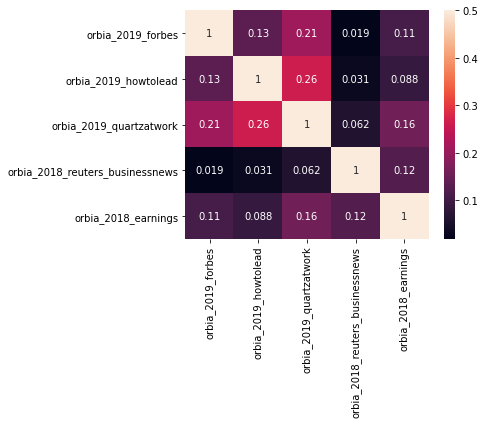

In [275]:
order = good + bad
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(sim_df.loc[order, order], vmax=0.5, annot=True)
plt.tight_layout()
plt.savefig('example_orbia_similarity.png')

In [266]:
order

['orbia_2019_forbes',
 'orbia_2019_howtolead',
 'orbia_2019_quartzatwork',
 'orbia_2018_reuters_businessnews',
 'orbia_2018_earnings']

In [276]:
pwd

'/Users/peterwinter/Work/IDEO/highlighter/notebooks'